In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

**Location or Size: What Influences House Prices in Brazil?**

- We've wrangled the data, 
- We've gained an understanding of its basic characteristics in our EDA, and 
- Now, it's time to ask some research questions. 

#### Import Data

In [2]:
df = pd.read_csv("C:/Users/Tsegi/Desktop/AAC_SCHOOL/DSProject/br/BrazilData_clean.csv")

In [3]:
df.head(3)

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110,187230.85,-35.708814,-35.708814,Alagoas
1,apartment,Northeast,65,81133.37,-35.704840,-35.704840,Alagoas
2,house,Northeast,211,154465.45,-35.729795,-35.729795,Alagoas


**Q1:Which state has the most expensive real estate market?**

- Do housing prices vary by state? 
- If so, which are the most expensive states for purchasing a home? 

In [4]:
# Declare variable `mpbs = mean_price_by_state`
mpbs = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
# Print object type, shape, and head
print(type(mpbs))
print(mpbs.shape)
mpbs

<class 'pandas.core.series.Series'>
(25,)


state
Minas Gerais           200534.601071
Ceará                  192614.281423
Distrito Federal       186818.838306
Pará                   183217.820669
Bahia                  183215.884689
Alagoas                180356.561250
Goiás                  171347.391982
Maranhão               167956.091683
Paraná                 164168.840031
Mato Grosso            163711.913953
Paraíba                157509.767960
Pernambuco             156582.231010
Espírito Santo         149688.857730
Amazonas               148744.510000
Amapá                  148349.220000
Santa Catarina         144611.686477
Rio de Janeiro         143045.788066
São Paulo              135926.765087
Mato Grosso do Sul     127473.475000
Rio Grande do Sul      110886.293897
Rio Grande do Norte    102783.647715
Piauí                   97982.723333
Sergipe                 90500.701176
Rondônia                70792.338000
Tocantins               57660.760000
Name: price_usd, dtype: float64

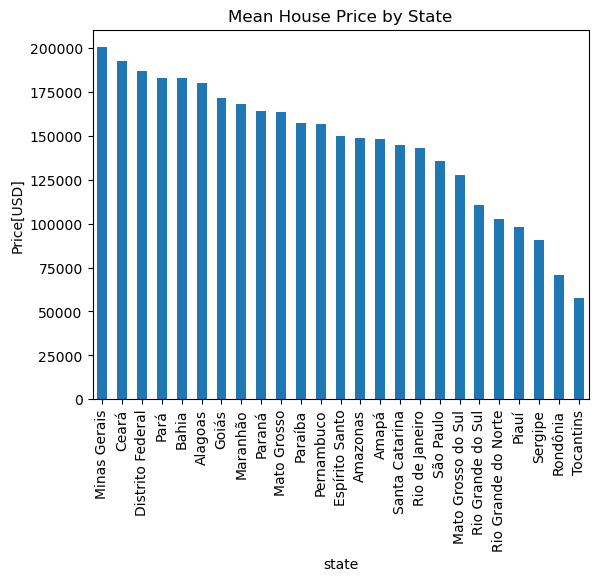

In [5]:
# Create bar chart from `mean_price_by_state` using pandas
mpbs.plot(
    kind="bar",
    xlabel="state",
    ylabel="Price[USD]",
    title="Mean House Price by State"
);

Querétaro would be the most expensive real estate market in Mexico.

Create a new column in `df` called `"price_per_m2"`. 

In [6]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"]/df["area_m2"]

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (22844, 8)


,property_type,region,area_m2,price_usd,lat,lon,state,price_per_m2
0,apartment,Northeast,110,187230.85,-35.708814,-35.708814,Alagoas,1702.098636
1,apartment,Northeast,65,81133.37,-35.704840,-35.704840,Alagoas,1248.205692
2,house,Northeast,211,154465.45,-35.729795,-35.729795,Alagoas,732.063744
3,apartment,Northeast,99,146013.20,-35.719556,-35.719556,Alagoas,1474.880808
4,apartment,Northeast,55,101416.71,-35.700227,-35.700227,Alagoas,1843.940182


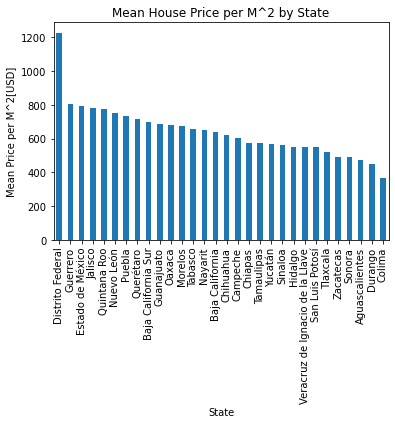

In [24]:
# Group `df` by "state", create bar chart of "price_per_m2"
(
    df
    .groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Mean Price per M^2[USD]",
        title="Mean House Price per M^2 by State"
    )
);

Now we see that the capital Mexico City (*Distrito Federal*) is by far the most expensive market.

**Q2:Is there a relationship between home size and price?**

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

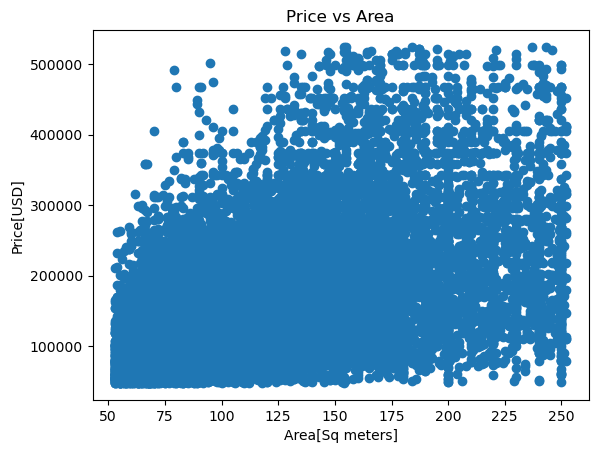

In [7]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(x=df["area_m2"],y=df["price_usd"])
# Add x-axis label
plt.xlabel("Area[Sq meters]")
# Add y-axis label
plt.ylabel("Price[USD]")
# Add title
plt.title("Price vs Area");

While there's a good amount of variation, there's definitely a positive correlation — in other words, the bigger the house, the higher the price. But how can we quantify this correlation? 

Using the `corr` method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"`. 

In [10]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["area_m2"].corr(df["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Brazil):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Brazil): 0.5340949262178334


In [ ]:
The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Bra. 